## 7 - K-means Clustering
## Table of Contents
<ul>
<li><a href="#1">Extracting Feature Vectors</a></li>
<li><a href="#2">Prepare data for K-means</a></li>
<li><a href="#3">Implement K-means clustering</a></li>
<li><a href="#4">Checking the cluster's metrics</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df_fractures = pd.read_csv("./output/df_fractures_4.csv")

df_fractures.head()

,fracture_id,segments,segments_color,segments_width,Xmin,Xmax,Ymin,Ymax,fracture_height,fracture_length,fracture_direction,total_size,w_average_angle_degree,w_average_brightness
0,0,"2799.9979,2886.5779,2715.0032,2797.5709,2704.0...",yellow,3,2704.0042,2799.9979,2726.5764,2886.5779,160.0015,95.9937,Vertical,194.911960,59.174355,164.262832
1,1,"2857.0003,2830.5703,2759.9982,2772.5739,2755.0...",blue,3,2755.0029,2857.0003,2736.5771,2830.5703,93.9932,101.9974,Horizontal,149.359400,43.338584,155.376969
2,2,"2612.9964,2824.5755,2708.7733,2805.8089",blue,3,2612.9964,2708.7733,2805.8089,2824.5755,18.7666,95.7769,Horizontal,97.598155,168.913872,152.000000
3,3,"2655.0037,2794.5735,2613.9955,2756.5784",blue,3,2613.9955,2655.0037,2756.5784,2794.5735,37.9951,41.0082,Horizontal,55.904383,42.815860,160.000000
4,4,"3004.443,2762.0149,3084.76,2774.2514,3121.4356...",blue,3,3004.4430,3121.4356,2762.0149,2778.0103,15.9954,116.9926,Horizontal,118.111506,7.785202,171.300731


In [3]:
# Reading the image grayscale
image = cv2.imread('Global_20190321_ShapeV20_200kfacets_FB3.png', cv2.IMREAD_GRAYSCALE)

image = cv2.flip(image, 0)

<a id='1'></a>
### Extracting Feature Vectors

In [4]:
def crop_hist(index, plot=False):

    Xmin, Xmax, Ymin, Ymax = int(df_fractures['Xmin'][index]), int(df_fractures['Xmax'][index]), int(df_fractures['Ymin'][index]), int(df_fractures['Ymax'][index])

    # Extending the frame 5 pixels if the fracture is completely horizontal or vertical
    fracture_height = int(df_fractures['fracture_height'][index])
    fracture_length = int(df_fractures['fracture_length'][index])

    if fracture_height < 1:
        Ymin = Ymin - 5
        Ymax = Ymax + 5

    if fracture_length < 1:
        Xmin = Xmin - 5
        Xmax = Xmax + 5

    cropped_image = image[Ymin:Ymax, Xmin:Xmax]

    number_of_bins = 10
    hist_values = np.histogram(cropped_image.ravel(), number_of_bins, [0, 256], density=True)[0]

    if plot == True:

        fig = plt.figure(figsize=(9, 3))

        rows, columns = 1, 3

        fig.add_subplot(rows, columns, 1)

        plt.imshow(cropped_image, cmap="gray")
        plt.axis('off')
        plt.title("Cropped Image")

        fig.add_subplot(rows, columns, 2)

        plt.hist(cropped_image.ravel(), number_of_bins, [0, 256])
        plt.title("Histogram")

        fig.add_subplot(rows, columns, 3)

        plt.hist(cropped_image.ravel(), number_of_bins,
                 [0, 256], density=True, color="black")
        plt.title("Normalised Histogram")

        fig.tight_layout()
        plt.show()

    return hist_values

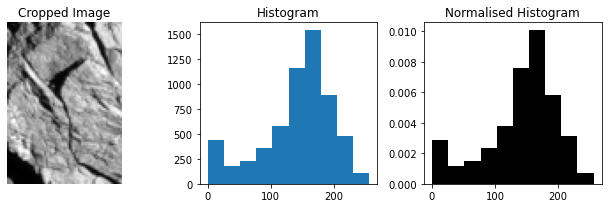

array([0.0028807 , 0.00119539, 0.001522  , 0.00234506, 0.0037952 ,
       0.00759041, 0.01007917, 0.00583978, 0.00312892, 0.00068588])

In [5]:
crop_hist(1460, plot = True)

<a id='2'></a>
### Prepare data for K-means

In [6]:
# creating an array to store feature vectors from each fracture image
feature_vectors = np.zeros((df_fractures.shape[0],8), dtype='float32')
feature_vectors.shape

(1529, 8)

In [7]:
# loop all fracture images, extract histogram and save to the 'feature_vectors' array
for i in range(df_fractures.shape[0]):
    feature_vector = crop_hist(index = i, plot = False)
    
    # remove first two bin values to threshold the shadows and insert into 'feature_vectors' array
    feature_vectors[i, :] = feature_vector[2:]

<a id='3'></a>
### Implement K-means clustering

In [8]:
# Using OpenCV

"""
# define stopping criteria
# the number of max iterations can be changed for faster convergence
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.01)

# Select a value for k
# then perform k-means clustering
k = 3

retval, labels, centers = cv2.kmeans(feature_vectors, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
"""

'\n# define stopping criteria\n# the number of max iterations can be changed for faster convergence\ncriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.01)\n\n# Select a value for k\n# then perform k-means clustering\nk = 3\n\nretval, labels, centers = cv2.kmeans(feature_vectors, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)\n'

In [9]:
# Using scikit-learn

n = 4

kmeans = KMeans(n_clusters=n, random_state=0).fit(feature_vectors)

labels = kmeans.labels_

labels

array([2, 2, 2, ..., 1, 1, 1])

In [10]:
kmeans.cluster_centers_

array([[2.9148185e-04, 4.8443989e-04, 7.5005228e-04, 1.4462178e-03,
        2.9190639e-03, 5.8259899e-03, 1.2058051e-02, 1.4595829e-02],
       [7.0661062e-04, 1.1868196e-03, 2.0178461e-03, 3.7600554e-03,
        7.4579301e-03, 1.1802067e-02, 8.8744396e-03, 2.1032298e-03],
       [9.9429581e-04, 1.8653350e-03, 3.9946567e-03, 9.7509855e-03,
        1.4580362e-02, 5.4175653e-03, 8.9897215e-04, 1.9740965e-04],
       [2.9159600e-03, 5.2219843e-03, 9.0656057e-03, 1.1225214e-02,
        4.6295887e-03, 1.0034926e-03, 3.2091187e-04, 9.2518516e-05]],
      dtype=float32)

In [11]:
# assign the labels (the id of the cluster) from kmeans to the dataframe as a new column
df_fractures['kmeans_cluster_id'] = kmeans.labels_

df_fractures.head()

,fracture_id,segments,segments_color,segments_width,Xmin,Xmax,Ymin,Ymax,fracture_height,fracture_length,fracture_direction,total_size,w_average_angle_degree,w_average_brightness,kmeans_cluster_id
0,0,"2799.9979,2886.5779,2715.0032,2797.5709,2704.0...",yellow,3,2704.0042,2799.9979,2726.5764,2886.5779,160.0015,95.9937,Vertical,194.911960,59.174355,164.262832,2
1,1,"2857.0003,2830.5703,2759.9982,2772.5739,2755.0...",blue,3,2755.0029,2857.0003,2736.5771,2830.5703,93.9932,101.9974,Horizontal,149.359400,43.338584,155.376969,2
2,2,"2612.9964,2824.5755,2708.7733,2805.8089",blue,3,2612.9964,2708.7733,2805.8089,2824.5755,18.7666,95.7769,Horizontal,97.598155,168.913872,152.000000,2
3,3,"2655.0037,2794.5735,2613.9955,2756.5784",blue,3,2613.9955,2655.0037,2756.5784,2794.5735,37.9951,41.0082,Horizontal,55.904383,42.815860,160.000000,2
4,4,"3004.443,2762.0149,3084.76,2774.2514,3121.4356...",blue,3,3004.4430,3121.4356,2762.0149,2778.0103,15.9954,116.9926,Horizontal,118.111506,7.785202,171.300731,2


In [12]:
df_fractures['kmeans_cluster_id'].value_counts()

1    526
2    397
3    386
0    220
Name: kmeans_cluster_id, dtype: int64

In [13]:
df_fractures.head()

,fracture_id,segments,segments_color,segments_width,Xmin,Xmax,Ymin,Ymax,fracture_height,fracture_length,fracture_direction,total_size,w_average_angle_degree,w_average_brightness,kmeans_cluster_id
0,0,"2799.9979,2886.5779,2715.0032,2797.5709,2704.0...",yellow,3,2704.0042,2799.9979,2726.5764,2886.5779,160.0015,95.9937,Vertical,194.911960,59.174355,164.262832,2
1,1,"2857.0003,2830.5703,2759.9982,2772.5739,2755.0...",blue,3,2755.0029,2857.0003,2736.5771,2830.5703,93.9932,101.9974,Horizontal,149.359400,43.338584,155.376969,2
2,2,"2612.9964,2824.5755,2708.7733,2805.8089",blue,3,2612.9964,2708.7733,2805.8089,2824.5755,18.7666,95.7769,Horizontal,97.598155,168.913872,152.000000,2
3,3,"2655.0037,2794.5735,2613.9955,2756.5784",blue,3,2613.9955,2655.0037,2756.5784,2794.5735,37.9951,41.0082,Horizontal,55.904383,42.815860,160.000000,2
4,4,"3004.443,2762.0149,3084.76,2774.2514,3121.4356...",blue,3,3004.4430,3121.4356,2762.0149,2778.0103,15.9954,116.9926,Horizontal,118.111506,7.785202,171.300731,2


### Elbow Method

In [14]:
kmax= 30

wcss = []

for n in range(1, kmax):
    kmeans = KMeans(n_clusters=n, init = 'k-means++').fit(feature_vectors)    
    wcss.append(kmeans.inertia_)

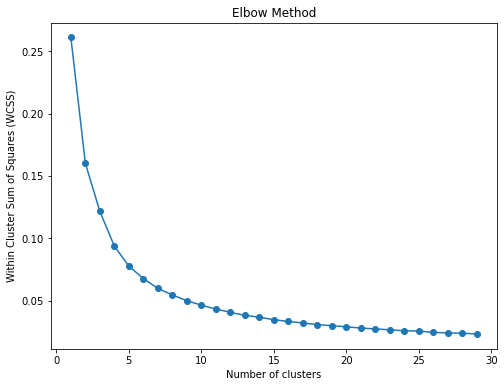

In [15]:
# Show Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, kmax), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.show()

### Silhouette Method

In [16]:
kmax = 20

sil = []

for n in range(2, kmax):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(feature_vectors)
    labels = kmeans.labels_
    sil.append(silhouette_score(feature_vectors, labels, metric='euclidean'))

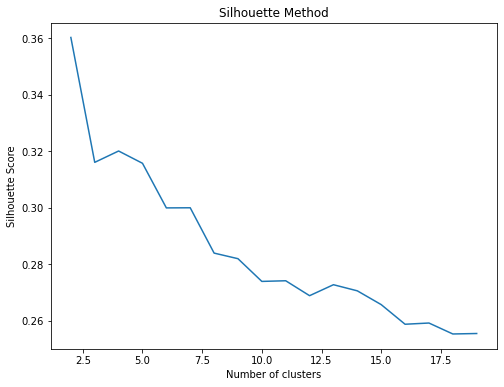

In [17]:
# Show Silhouette plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, kmax), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

<a id='4'></a>
### Checking the cluster's metrics

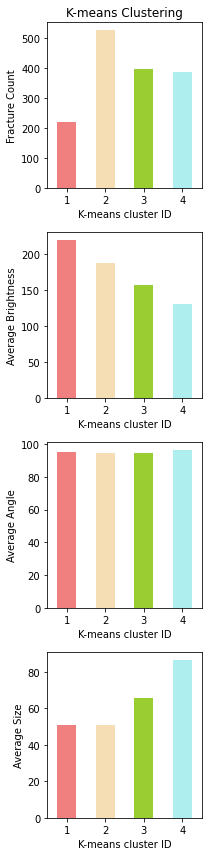

In [18]:
plt.figure(figsize=(3, 12))

new_cluster_ids = [1, 2, 3, 4]

bar_colors=['lightcoral', 'wheat', 'yellowgreen', 'paleturquoise', 'plum']

plt.subplot(4, 1, 1)
ax1 = df_fractures.groupby('kmeans_cluster_id')['kmeans_cluster_id'].count().plot(kind='bar', color=bar_colors)
ax1.set_title('K-means Clustering')
ax1.set_xlabel("K-means cluster ID")
ax1.set_ylabel("Fracture Count")
# renmae cluster IDs
ax1.set_xticklabels(new_cluster_ids, rotation = 0)

plt.subplot(4, 1, 2)
ax2 = df_fractures.groupby('kmeans_cluster_id')['w_average_brightness'].mean().plot(kind='bar', color=bar_colors)
ax2.set_xlabel("K-means cluster ID")
ax2.set_ylabel("Average Brightness")
# renmae cluster IDs
ax2.set_xticklabels(new_cluster_ids, rotation = 0)

plt.subplot(4, 1, 3)
ax3 = df_fractures.groupby('kmeans_cluster_id')['w_average_angle_degree'].mean().plot(kind='bar', color=bar_colors)
ax3.set_xlabel("K-means cluster ID")
ax3.set_ylabel("Average Angle")
# renmae cluster IDs
ax3.set_xticklabels(new_cluster_ids, rotation = 0)

plt.subplot(4, 1, 4)
ax4 = df_fractures.groupby('kmeans_cluster_id')['total_size'].mean().plot(kind='bar', color=bar_colors)
ax4.set_xlabel("K-means cluster ID")
ax4.set_ylabel("Average Size")
# renmae cluster IDs
ax4.set_xticklabels(new_cluster_ids, rotation = 0)

plt.tight_layout()
plt.show()

In [19]:
df_clusters_stats = df_fractures.groupby('kmeans_cluster_id')['w_average_brightness', 'w_average_angle_degree', 'total_size'].mean()

df_clusters_stats['count'] =  df_fractures.groupby('kmeans_cluster_id')['kmeans_cluster_id'].count().to_frame()

# rename cluster IDs
df_clusters_stats.index = new_cluster_ids

df_clusters_stats

C:\Users\saram\AppData\Local\Temp\ipykernel_14112\597485149.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clusters_stats = df_fractures.groupby('kmeans_cluster_id')['w_average_brightness', 'w_average_angle_degree', 'total_size'].mean()


,w_average_brightness,w_average_angle_degree,total_size,count
1,218.793531,94.958523,50.952444,220
2,186.542754,94.369419,50.861746,526
3,156.033968,94.833773,65.865834,397
4,130.653325,96.340064,86.509164,386
